<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/main/ARIMA_wind_Speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Import Dataset**

In [168]:
df=pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv')
df=df[['Date & Time','Wind Speed m/s']]
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")
df.set_index('Date & Time',inplace=True)
df=df.head(10000)
df.tail()

,Wind Speed m/s
Date & Time,
2021-06-03 03:45:50,8.3
2021-06-03 03:46:00,7.2
2021-06-03 03:46:10,7.8
2021-06-03 03:46:20,7.6
2021-06-03 03:46:30,7.4


In [169]:
type(df)

pandas.core.frame.DataFrame

# **Convert to series**

In [170]:
df_series=df.values
type(df_series)

numpy.ndarray

In [171]:
df.size

10000

In [172]:
df.describe()

,Wind Speed m/s
count,10000.00000
mean,8.07975
std,0.93782
min,4.80000
25%,7.40000
50%,8.10000
75%,8.70000
max,11.40000


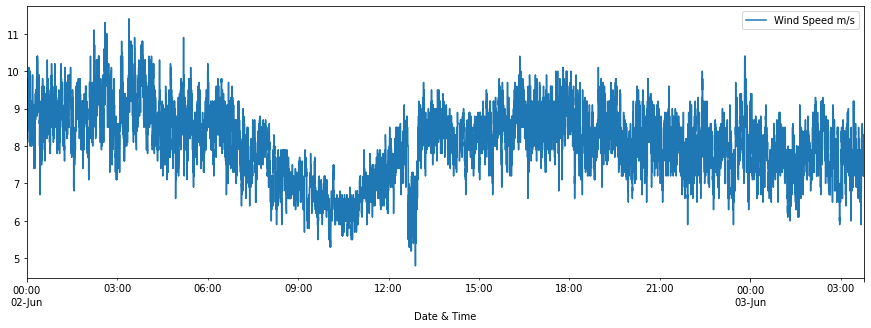

In [173]:
df.plot(figsize=(15,5))

# ***Smoothing***

In [174]:
df_mean=df.rolling(window = 10).mean()#taking moving average

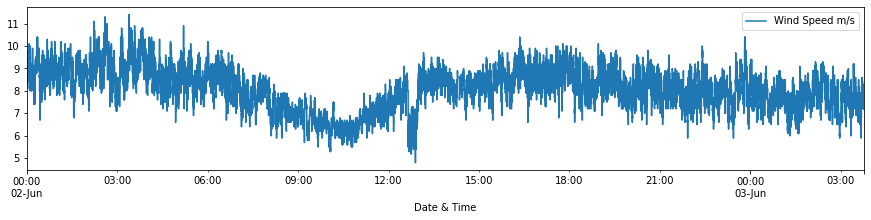

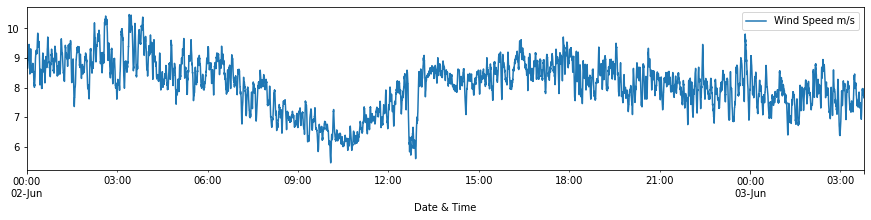

In [175]:
df.plot(figsize=(15,3))
df_mean.plot(figsize=(15,3))

# **Base line model**

In [176]:
value=pd.DataFrame(df_series)# same as df

In [177]:
df_new=pd.concat([df,df.shift(1)],axis=1)
df_new.head()

,Wind Speed m/s,Wind Speed m/s
Date & Time,,
2021-06-02 00:00:00,8.4,NaN
2021-06-02 00:00:10,8.3,8.4
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4


In [178]:
df_new.columns = ['Actual','Forecast']
df_new.head()

,Actual,Forecast
Date & Time,,
2021-06-02 00:00:00,8.4,NaN
2021-06-02 00:00:10,8.3,8.4
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4


In [179]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [180]:
df_new=df_new[1:]
df_new.head()

,Actual,Forecast
Date & Time,,
2021-06-02 00:00:10,8.3,8.4
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4
2021-06-02 00:00:50,9.1,9.2


In [181]:
error=mean_squared_error(df_new.Actual,df_new.Forecast)
error

0.22768077

In [182]:
np.sqrt(error)

0.47715905

# ***ARIMA*** **(p,d,q)**
Autoregressive (p) Integrated(d) Moving Average(q)


*   ***pacf*** for identify p
*   ***acf*** for identify q



In [183]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

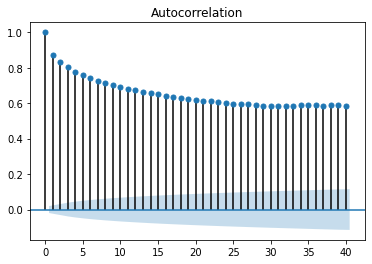

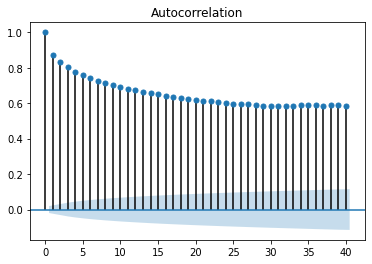

In [184]:
plot_acf(df)# to q=17

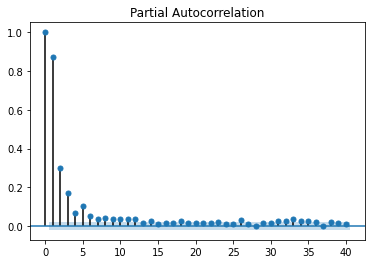

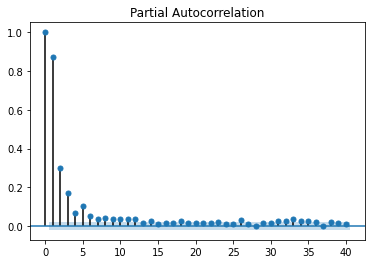

In [185]:
plot_pacf(df)#to p=3

In [186]:
#p=3  d=0 q=17,18

df_train=df[0:8000]
df_test=df[8000:]

In [187]:
from statsmodels.tsa.arima_model import ARIMA
df_model=ARIMA(df_train,order=(2,0,2))
df_model_fit=df_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


In [188]:
df_model_fit.aic

8961.043913437841

In [191]:
df_forecast= df_model_fit.forecast(steps=2000)[0]

In [192]:
df_forecast=pd.DataFrame(df_forecast,index=df_test.index)
df_forecast.columns=['Wind Speed m/s']
df_forecast.tail()

,Wind Speed m/s
Date & Time,
2021-06-03 03:45:50,8.143396
2021-06-03 03:46:00,8.143434
2021-06-03 03:46:10,8.143472
2021-06-03 03:46:20,8.143510
2021-06-03 03:46:30,8.143547


In [193]:
df_test.tail()

,Wind Speed m/s
Date & Time,
2021-06-03 03:45:50,8.3
2021-06-03 03:46:00,7.2
2021-06-03 03:46:10,7.8
2021-06-03 03:46:20,7.6
2021-06-03 03:46:30,7.4


In [194]:
np.sqrt(mean_squared_error(df_test,df_forecast))

0.7347992272094789

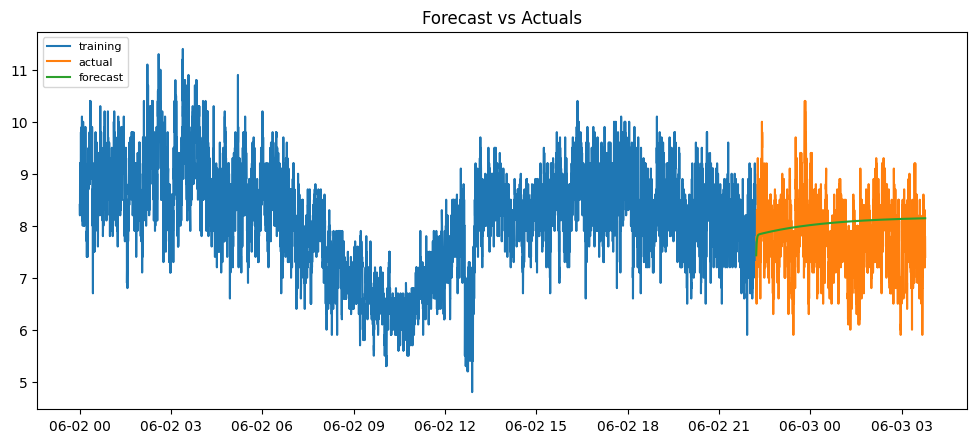

In [195]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='actual')
plt.plot(df_forecast, label='forecast',)
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()